### Importing Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



### 1. Load the Dataset


In [24]:
housing_df = pd.read_csv('housing.csv')
print("Dataset Loaded Successfully!")
print(housing_df.head())




Dataset Loaded Successfully!
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


### 2. Data Exploration and Cleaning
#### Check for missing values


In [25]:
missing_values = housing_df.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)



Missing Values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


#### Handle missing values - fill missing 'total_bedrooms' with median


In [26]:
median1=housing_df['total_bedrooms'].median()
housing_df['total_bedrooms'].fillna(value=median1,inplace=True)


#### Get summary statistics


In [27]:
summary_stats = housing_df.describe()
print("\nSummary Statistics:\n", summary_stats)




Summary Statistics:
           longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900  

#### Visualize data distribution and identify outliers


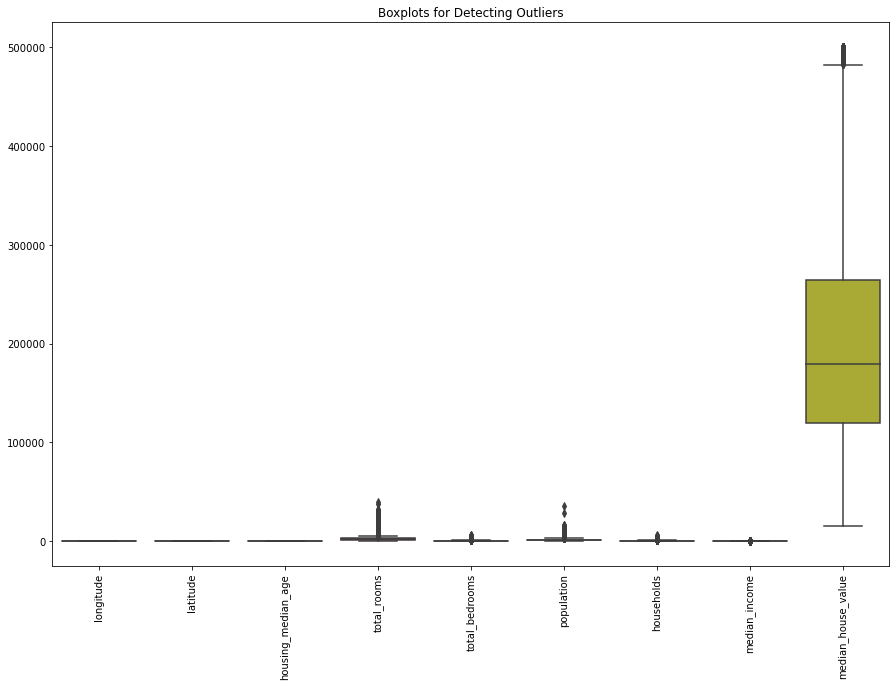

In [28]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=housing_df)
plt.xticks(rotation=90)
plt.title("Boxplots for Detecting Outliers")
plt.show()



### 3. Univariate and Bivariate Analysis
#### Exclude the categorical column 'ocean_proximity' for correlation


In [29]:
numerical_df = housing_df.drop(columns=['ocean_proximity'])
numerical_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


#### Correlation matrix


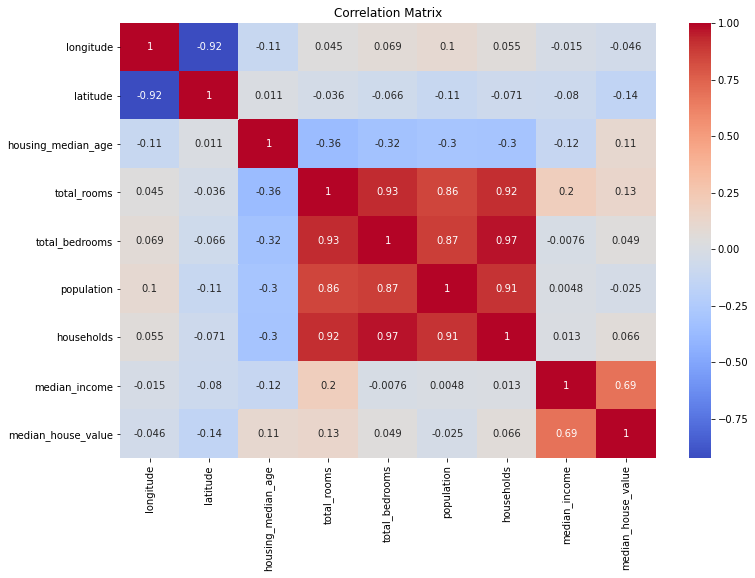

In [30]:
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



#### Scatter plots to explore relationships with the target variable


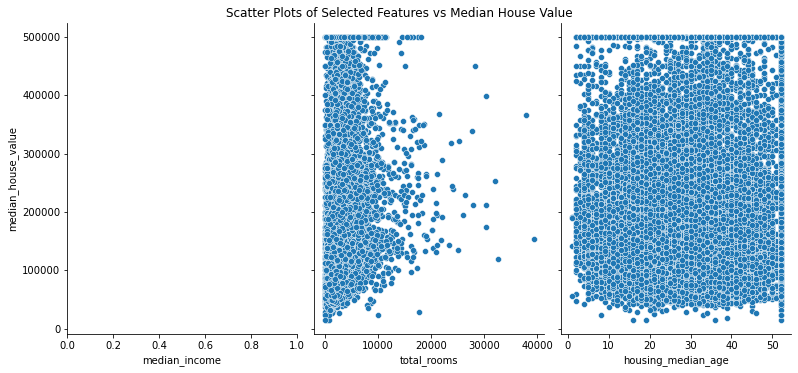

In [10]:
sns.pairplot(housing_df, x_vars=['median_income', 'total_rooms', 'housing_median_age'], y_vars='median_house_value', height=5, aspect=0.75)
plt.suptitle("Scatter Plots of Selected Features vs Median House Value", y=1.02)
plt.show()


### 4. Modeling
#### Prepare data - include 'ocean_proximity' as dummy variables


In [11]:
housing_df = pd.get_dummies(housing_df, columns=['ocean_proximity'], drop_first=True)


#### Select features for modeling


In [12]:
X = housing_df[['median_income', 'total_rooms', 'housing_median_age']]  # You can add more features here
y = housing_df['median_house_value']



#### Split data into training and testing sets


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### Build the model


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

#### Predict and evaluate the model


In [15]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error of the model: {mse}')

Mean Squared Error of the model: 6563178660.010065


In [19]:
y_pred=model.predict(X_test)
rse=r2_score(y_test,y_pred)
print(f' R-squared (R²) Error: {rse}')


 R-squared (R²) Error: 0.4991503592397153


### Cofficients and Intercepts of the Model

In [21]:
coefficients = model.coef_   
intercept = model.intercept_ 
print("Coefficients:",coefficients)
print("Intercept:",intercept)

Coefficients: [4.26533268e+04 3.85104556e+00 1.97574393e+03]
Intercept: -25029.511934195034
